In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from pprint import pprint

In [3]:
#Import csv
raw_game_data = pd.read_csv("vgsales-12-4-2019.csv")
raw_game_data.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [4]:
#Filter columns to only ones we need for analysis
base_game_df = raw_game_data.loc[:, ["Name", "Genre", "Platform", "Critic_Score", "Global_Sales", "NA_Sales",
                                     "PAL_Sales", "JP_Sales", "Other_Sales", "Year"]]

#Rename columns
base_game_df = base_game_df.rename(columns={"Critic_Score": "Critic Score", "Global_Sales": "Global Sales", "NA_Sales": "NA Sales",
                                           "PAL_Sales": "PAL Sales", "JP_Sales": "JP Sales", "Other_Sales": "Other Sales"})

base_game_df

,Name,Genre,Platform,Critic Score,Global Sales,NA Sales,PAL Sales,JP Sales,Other Sales,Year
0,Wii Sports,Sports,Wii,7.7,NaN,NaN,NaN,NaN,NaN,2006.0
1,Super Mario Bros.,Platform,NES,10.0,NaN,NaN,NaN,NaN,NaN,1985.0
2,Mario Kart Wii,Racing,Wii,8.2,NaN,NaN,NaN,NaN,NaN,2008.0
3,PlayerUnknown's Battlegrounds,Shooter,PC,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
4,Wii Sports Resort,Sports,Wii,8.0,NaN,NaN,NaN,NaN,NaN,2009.0
...,...,...,...,...,...,...,...,...,...,...
55787,Indivisible,Role-Playing,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55788,Lost Ember,Adventure,PC,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55789,Lost Ember,Adventure,PS4,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55790,Lost Ember,Adventure,XOne,NaN,NaN,NaN,NaN,NaN,NaN,2019.0


In [30]:
#Filter Year to 2009-2019
game_df = base_game_df[(base_game_df['Year'] >= 2013) & (base_game_df['Year'] <= 2017)]
#game_df = base_game_df[base_game_df["Year"] >= 2014]
game_df

,Name,Genre,Platform,Critic Score,Global Sales,NA Sales,PAL Sales,JP Sales,Other Sales,Year
3,PlayerUnknown's Battlegrounds,Shooter,PC,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
19,Grand Theft Auto V,Action,PS3,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
20,Grand Theft Auto V,Action,PS4,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
28,Pokemon X/Y,Role-Playing,3DS,8.9,NaN,NaN,NaN,NaN,NaN,2013.0
31,Pokemon Sun/Moon,Role-Playing,3DS,9.0,NaN,NaN,NaN,NaN,NaN,2016.0
...,...,...,...,...,...,...,...,...,...,...
55756,Yodanji,Role-Playing,NS,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
55758,Yono and the Celestial Elephants,Adventure,NS,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
55759,Yooka-Laylee,Platform,NS,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
55775,ZOMBIE GOLD RUSH,Action,NS,NaN,NaN,NaN,NaN,NaN,NaN,2017.0


In [31]:
game_df2 = game_df.loc[:, ["Genre", "Global Sales", "Year"]]
game_df2.head()

#drop NaN's
game_df3 = game_df2.dropna()
game_df3

,Genre,Global Sales,Year
19,Action,20.32,2013.0
20,Action,19.39,2014.0
32,Action,15.86,2013.0
34,Shooter,15.09,2015.0
50,Shooter,13.40,2017.0
...,...,...,...
21141,Fighting,0.00,2013.0
21148,Misc,0.00,2014.0
21152,Puzzle,0.00,2013.0
21162,Misc,0.00,2014.0


In [32]:
# Group genres together
game_year = game_df3.groupby(['Genre', 'Year'])
# Get the total global sales per year
yearly_sales = game_year['Global Sales'].sum()
# Chart the Data

yearly_sales

Genre         Year  
Action        2013.0    71.73
              2014.0    61.27
              2015.0    53.17
              2016.0    27.00
              2017.0    36.10
                        ...  
Visual Novel  2013.0     0.18
              2014.0     0.41
              2015.0     0.34
              2016.0     0.37
              2017.0     0.51
Name: Global Sales, Length: 85, dtype: float64

In [33]:
genre_sales = pd.DataFrame({
    "Global Sales": yearly_sales
})

genre_sales

Global Sales
Genre        Year                
Action       2013.0         71.73
             2014.0         61.27
             2015.0         53.17
             2016.0         27.00
             2017.0         36.10
...                           ...
Visual Novel 2013.0          0.18
             2014.0          0.41
             2015.0          0.34
             2016.0          0.37
             2017.0          0.51

[85 rows x 1 columns]

Text(0, 0.5, 'Global Sales (m)')

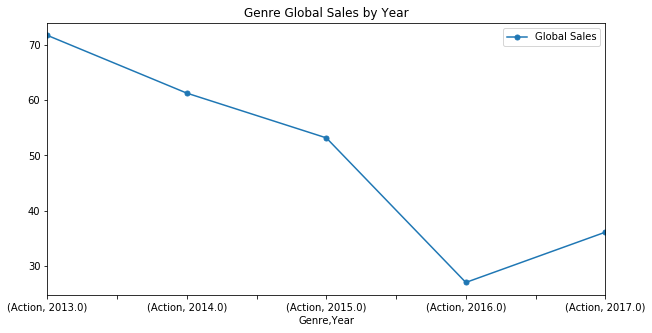

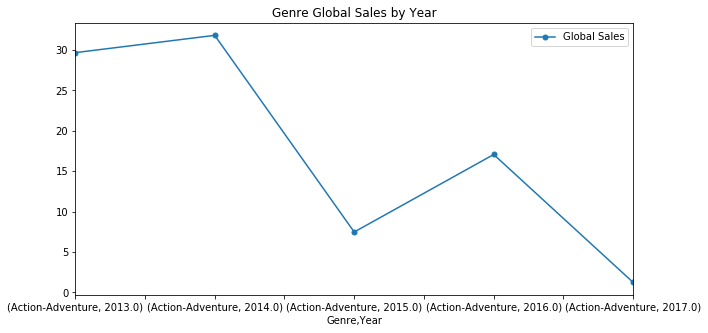

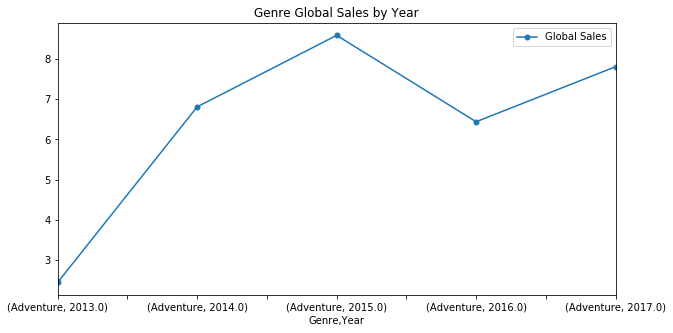

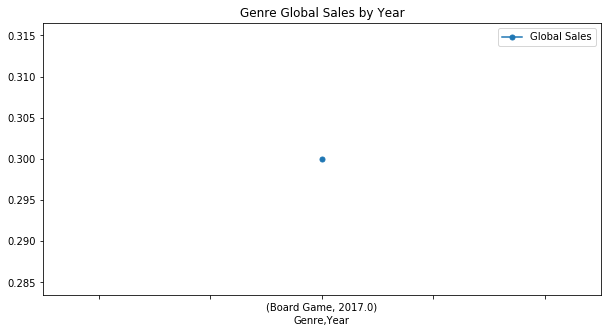

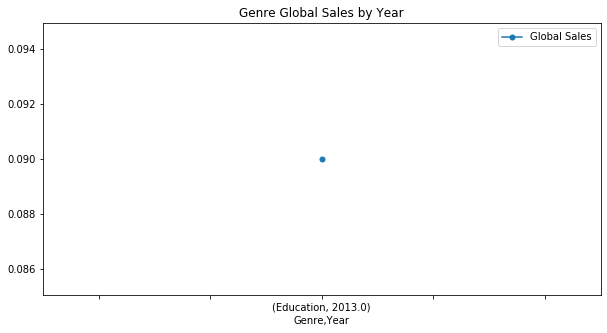

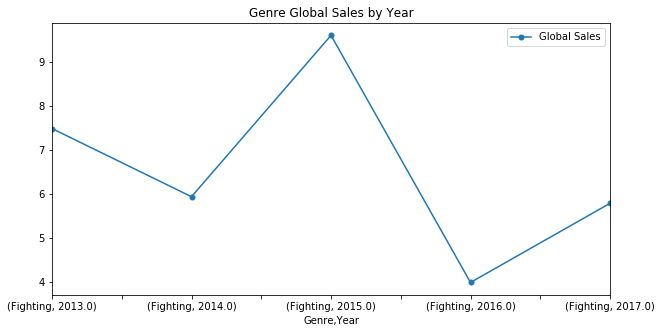

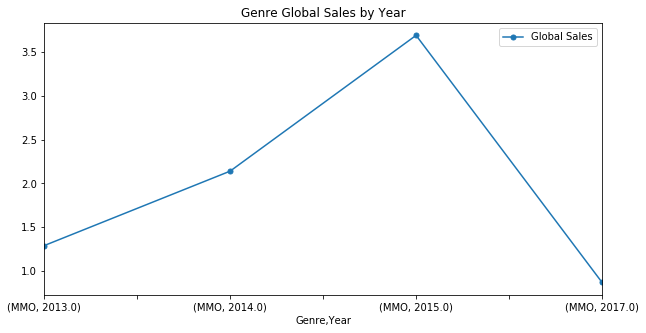

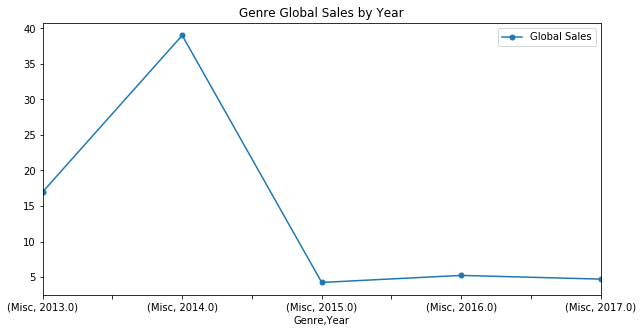

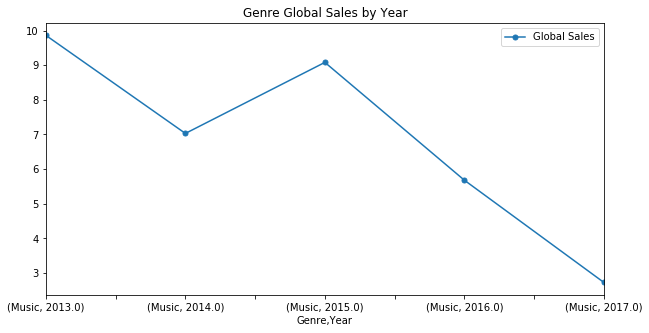

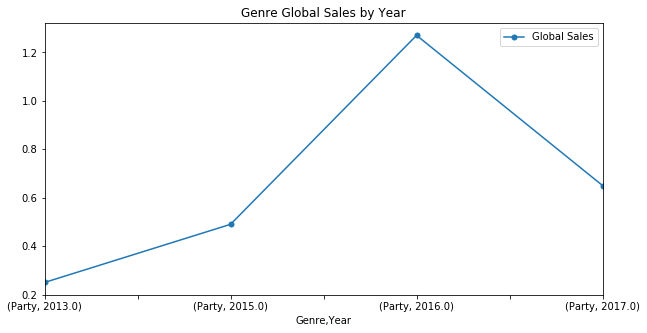

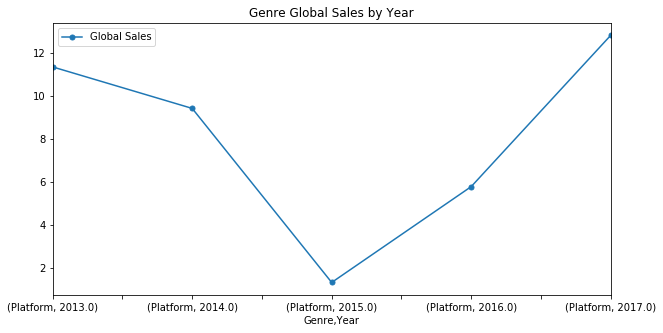

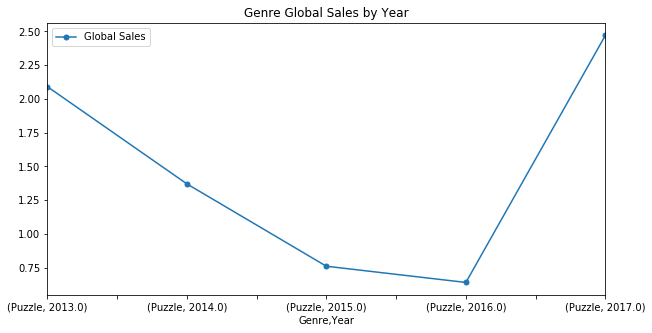

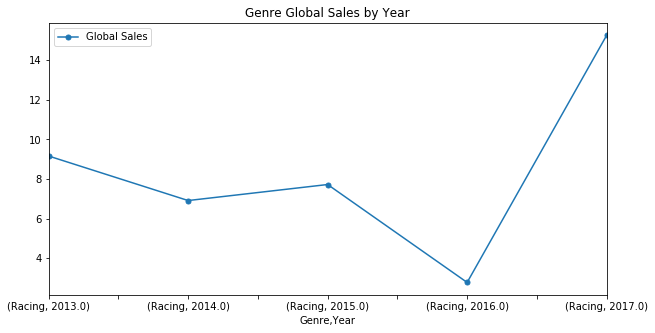

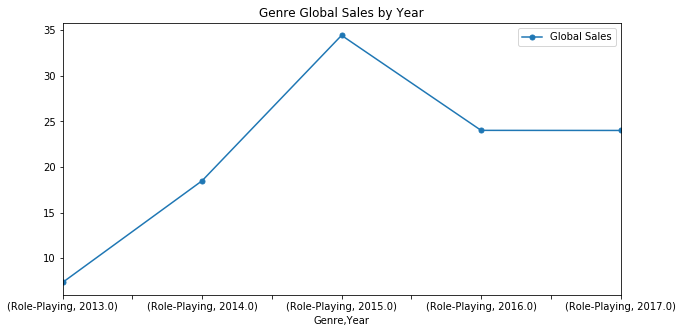

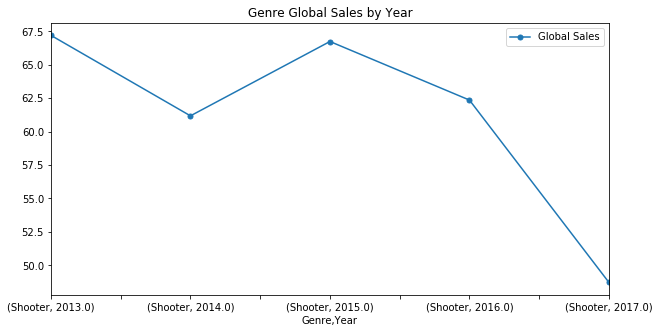

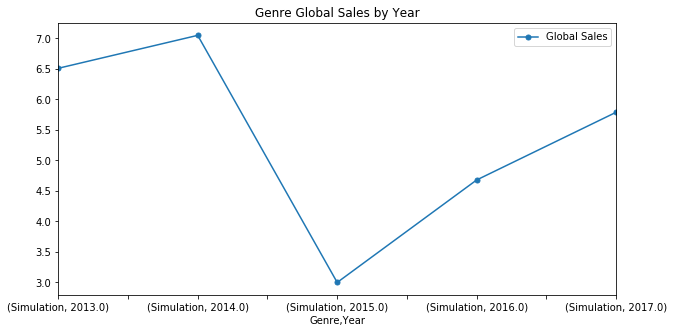

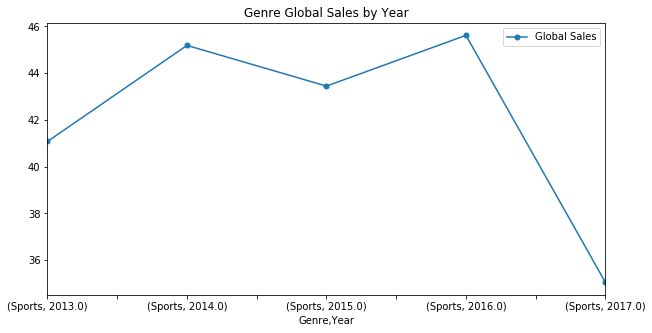

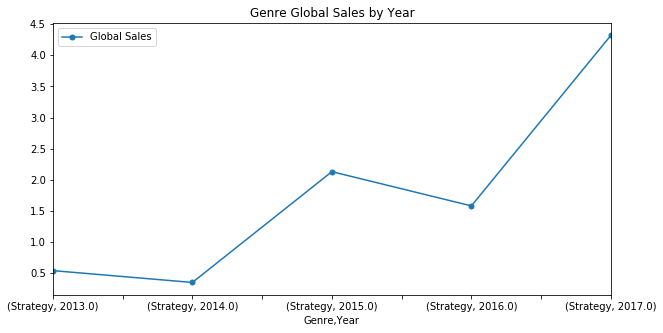

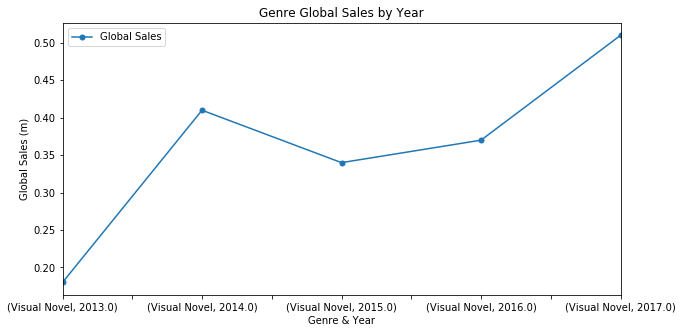

In [41]:
genre_sales.groupby("Genre").plot( y="Global Sales", figsize=(10,5), marker='.', markersize=10, title='Genre Global Sales by Year')
plt.xlabel("Genre & Year")
plt.ylabel("Global Sales (m)")

